In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

# Task 3: Load Dataset

In [21]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [22]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


# Task 4: Descriptive Statistics

Text(0.5, 1.0, 'Boxplot MEDV')

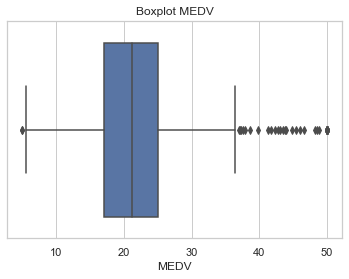

In [23]:
#fig=plt.figure()
#ax=fig.add_subplot(1,1,1)
#ax.boxplot(boston_df['MEDV'], )
ax = sns.boxplot(x='MEDV', data=boston_df)
ax.set_title('Boxplot MEDV')

In [24]:
#Provide a bar plot for the Charles river variable. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

In [25]:
division_eval = boston_df.groupby('CHAS')[['MEDV']].mean().reset_index()
division_eval

,CHAS,MEDV
0,0.0,22.093843
1,1.0,28.440000


Text(0.5, 1.0, 'Barplot Charles river variable')

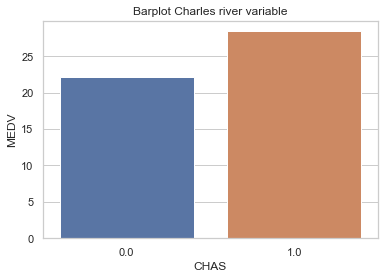

In [26]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", y="MEDV", data=division_eval)
ax.set_title('Barplot Charles river variable')

In [27]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


In [28]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [29]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


Text(0.5, 1.0, 'MEDV vs Age variable')

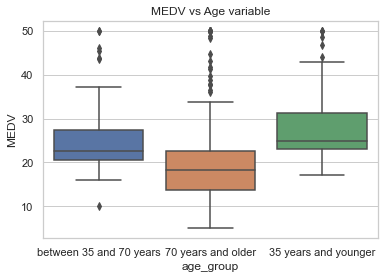

In [30]:
sns.set(style="whitegrid")
ax=sns.boxplot("age_group", y="MEDV", data=boston_df)
ax.set_title('MEDV vs Age variable')

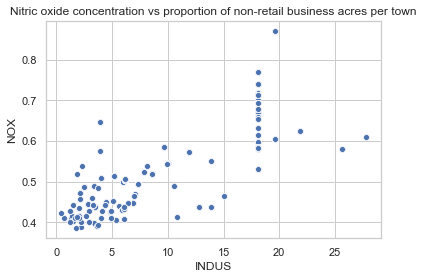

In [31]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x='INDUS',y='NOX',data=boston_df).set_title('Nitric oxide concentration vs proportion of non-retail business acres per town')


In [32]:
# Relationship:tendence of increasing the number of non-retail business acres while NOX increases till a aprox limit of 18 (INDUS), seems to be a kind of saturation

Text(0.5, 1.0, 'Histogram for pupit to teacher ratio variable')

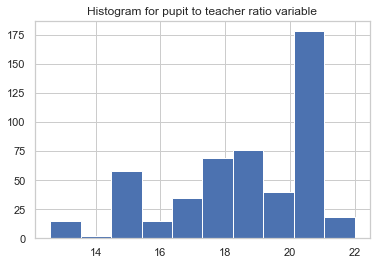

In [33]:
#Create a histogram for the pupil to teacher ratio variable
plt.hist(boston_df['PTRATIO'])
plt.title("Histogram for pupit to teacher ratio variable")

# Task 5: use appropriate tests to answer the questions provided

In [34]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#Null hypothesis: there is no difference in median value of houses bounded by the Charles river or not
#Alternative hypothesis: there is  difference in median value of houses bounded by the Charles river or not
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 1]["MEDV"],
                   boston_df[boston_df["CHAS"] == 0]["MEDV"], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [35]:
#pvalue <0.05 => We reject the null hypothesis => there is significant difference in median value

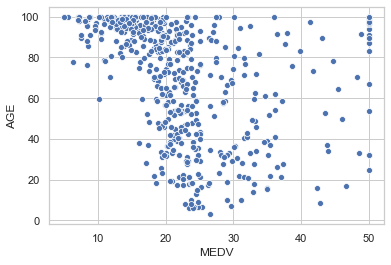

In [36]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#Null hypothesis: there is no difference in median value of houses MEDV for each proportion of owner occupied units build prior to 1940 (AGE)
#Alternative hypothesis: there is significant difference in median value of houses MEDV for each proportion of owner occupied units build prior to 1940 (AGE)
ax = sns.scatterplot(x="MEDV", y="AGE", data=boston_df)

In [37]:
#First, separate the three samples (one for each age category) into a variable each.
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [38]:
#Now, run a ANOVA.
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [39]:
#P-Value <0.05 => We reject the null hypothesis => there is significant difference in median value of houses MEDV for each proportion of owner occupied units build prior to 1940 (AGE)

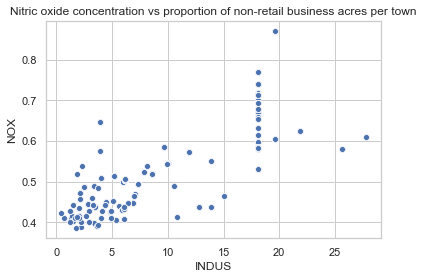

In [40]:
# Can we conclude that there is no relationship between Nitric oxide concentrations NOX and INDUS proportion of non-retail business acres per town? (Pearson Correlation)
# Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot
ax = sns.scatterplot(x='INDUS',y='NOX',data=boston_df).set_title('Nitric oxide concentration vs proportion of non-retail business acres per town')
#Null hypothesis: there is no difference in INDUS depending on NOX value
#Alternative hypothesis: there is significant difference in INDUS depending on NOX value


In [41]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['MEDV'])

(-0.4273207723732826, 7.065041586251507e-24)

In [42]:
#P-Value <0.05 => We reject the null hypothesis => there is significant difference in INDUS depending on NOX value

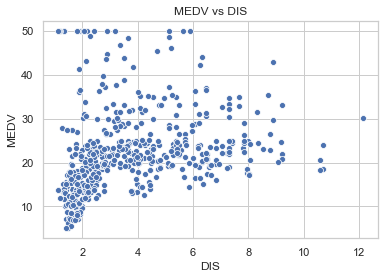

In [43]:
# What is the impact of an additional [weighted distance to the five Boston employment centres-DIS) on the MEDV-median value of owner occupied homes? (Regression analysis)
#Null hypothesis: there is no difference in MEDV depending on DIS
#Alternative hypothesis: there is no difference in MEDV depending on DIS
ax = sns.scatterplot(x='DIS',y='MEDV',data=boston_df).set_title('MEDV vs DIS')


In [44]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        17:18:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#p=0>0.05 => we can not reject the null hypothesis, we conclude there is no difference in MEDV depending on DIS